## Г. Оюуномин B221910802

NetworkX бол Python хэл дэх олон төрлийн сүлжээний бүтцийг үүсгэх,
засварлах, судлах боломжийг олгодог сан юм. Энэ нь нийгмийн, биологийн
болон дэд бүтцийн сүлжээг шинжлэх хэрэгслүүдийг хангахын зэрэгцээ том
хэмжээний өгөгдөлтэй хялбар ажиллах боломжийг олгодог.

In [ ]:
!pip install networkx

Сангуудыг импортлох буюу дуудах шаардлагатай. Үүнд networkx, warnings, pandas, numpy, matplotlib сангууд багтана.
warnings сан нь Python дээр анхааруулга үүсгэх, удирдах боломжийг олгож, програмын ажиллагааг тасалдуулахгүйгээр мэдээлэл өгнө.
pandas сан нь өгөгдлийг боловсруулах, удирдах, шинжлэх зориулалттай бөгөөд хүснэгт (DataFrame) болон цуваа (Series) өгөгдлийн бүтэцтэй ажиллахад ашиглагдана.
numpy сан нь тоон өгөгдлийг үр ашигтай хадгалах, боловсруулахад зориулагдсан ба олон хэмжээст массив (array) болон матрицын үйлдлүүдийг дэмждэг.
matplotlib сан нь график, диаграмм зурах, өгөгдлийн визуализаци хийхэд ашиглагдана.
random сан нь санамсаргүй тоо үүсгэх, холих, түүврийн өгөгдөл сонгох зэрэг үйлдлүүдийг гүйцэтгэхэд зориулагдсан Python-ийн стандарт сан юм.
matplotlib.colors дэд сан нь matplotlib-ийн өнгөний тохиргоо, өөрчлөлтийг хийхэд ашиглагддаг бөгөөд RGB, HEX болон бусад өнгөний схемүүдийг удирдах боломжийг олгодог.


In [ ]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')
%matplotlib inline

Энэхүү хэсэсгт CSV файлуудаас Game of Thrones дүрүүдийн харилцан үйлчлэлийн өгөгдлийг уншиж, NetworkX ашиглан сүлжээ (график) байгуулж, дүрүүдэд байшин буюу house хуваарилж байна. Дараа нь дүрслэхийн тулд зангилааны байрлалыг тооцоолно.

In [ ]:
from google.colab import drive  # Google Drive руу хандах сан

# Google Drive хандаж өгөгдөл авахад бэлтгэх
drive.mount('/content/drive')

# edge list бүхий .csv файлыг уншиж граф үүсгэх функц
def read_net(filename):
    g = nx.Graph()  # Хоосон граф үүсгэх
    with open(filename) as f:
        f.readline()  # Толгой болох эхний мөрийг алгасах
        # Мөр бүрийн хувьд давталт гүйлгэн
        for l in f:
            l = l.split(",")  # Таслалаар хязгаарлан өгөгдлийн утгуудыг унших
            g.add_edge(l[0], l[1])  # 2 оройг холбосон ирмэгийг нэмэх
    return g  # Үүсгэсэн графаа буцаах

# Дүн шинжилгээ хийх гэж буй Game of Thrones бүлгийг тодорхойлж өгнө
season = 6

# Өмнө тодорхойлсон функцээ ашиглан файлаас графаа үүсгэнэ
g = read_net(f'/content/drive/My Drive/asioaf/got-s{season}-edges.csv')

# Дүр бүрийн house-г хадгалж авах dictionary зарлана
houses = {}

# Оройн утгуудыг уншина
with open(f'/content/drive/My Drive/asioaf/got-s{season}-nodes_ext.csv') as f:
    f.readline()  # Толгой болох эхний мөрийг алгасах
    for l in f:
        node, _, house = l.rstrip().split(",")  # Дүрийн нэр болон байшинг хадгалах
        g.add_node(node, house=house)  # Оноогдсон оройд байшингийн утгыг онооно

# Оройн байрлалыг тооцоолох
pos = nx.spring_layout(g)


Mounted at /content/drive


Дараах draw_net функц нь жижиг сүлжээг дүрслэн харуулах функц юм. Энэ нь график, зангилааны байрлал, зангилааны тусгай утгуудын багц, гарчиг зэргийг авна. Зангилааг хэмжигдэхүүнд заасан утгууд дээр үндэслэн өнгөөр ​​ялгадаг бөгөөд энэ нь градусын төвлөрөл, хоорондын төвлөрөл, кластерын коэффициент гэх мэт сүлжээний хэмжүүрүүдэд дүн шинжилгээ хийх, тайлбарлахад тустай болгодог.

In [ ]:
def draw_net(G, pos, measures, measure_name):
    """
    Өгөгдсөн хэмжүүрийн дагуу өнгөт зангилаа бүхий сүлжээг зурна.
    """
    plt.figure(figsize=(20, 20))  # Figure хэмжээг зааж өгнө

    # Хэмжилтийн утгыг илэрхийлсэн өнгөөр зангилааг зурна
    nodes = nx.draw_networkx_nodes(
        G, pos, node_size=250, cmap=plt.cm.plasma,
        node_color=list(measures.values()),
        nodelist=measures.keys()
    )

    # symmetric logarithmic scale ашиглан утгуудыг нормчлоно
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))

    nx.draw_networkx_labels(G, pos)  # Зангилануудад label буюу нэр өгнө
    nx.draw_networkx_edges(G, pos, alpha=0.2)  # 0.2 хувийн харагдацтай болгоно

    plt.title(measure_name)  # Графын нэрийг өгөх
    plt.colorbar(nodes)  # Зангилаанудын утгыг илэрхийлэх өнгийн хүснэгт үүсгэх
    plt.axis('off')  # Тэнхлэгүүдийг арилгах
    plt.show()  # Графаа харуулах


### Centrality measures
Бид зангилаануудын хувьд тухайн сүлжээндээ хэр чухал болохыг нь хэмжихдээ centrality хэмжүүр ашигладаг.

**Bad term:**
*   nothing to do with being central in general

**Usage:**
*   Зарим centrality хэмжүүрүүд нь ойлгох тайлбарлахад энгийн амар хялбар байдаг.
*    Мөн centrality хэмжүүрүүд нь граф дээр машин сургалтыг хэрэгжүүлэх зангилааны шинж чанраар (node features) ашиглагддаг.


Бид python хэлний network сангаа ашиглаж зангилааны centrality хэмжүүрүүдийг амар хялбар бодож болно.

### Degree Centrality
Тухайн зангилаа хэр олон хөрш оройтой вэ?


In [ ]:
degrees = dict(g.degree()) # Зангилаануудын зэргийг тооцоолно

Зэргийн centrality-р нь эрэмбэлэн эхний тавыг нь хэвлэж харна

In [ ]:
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 40), ('JON', 31), ('CERSEI', 27), ('TYRION', 26), ('JAIME', 24)]

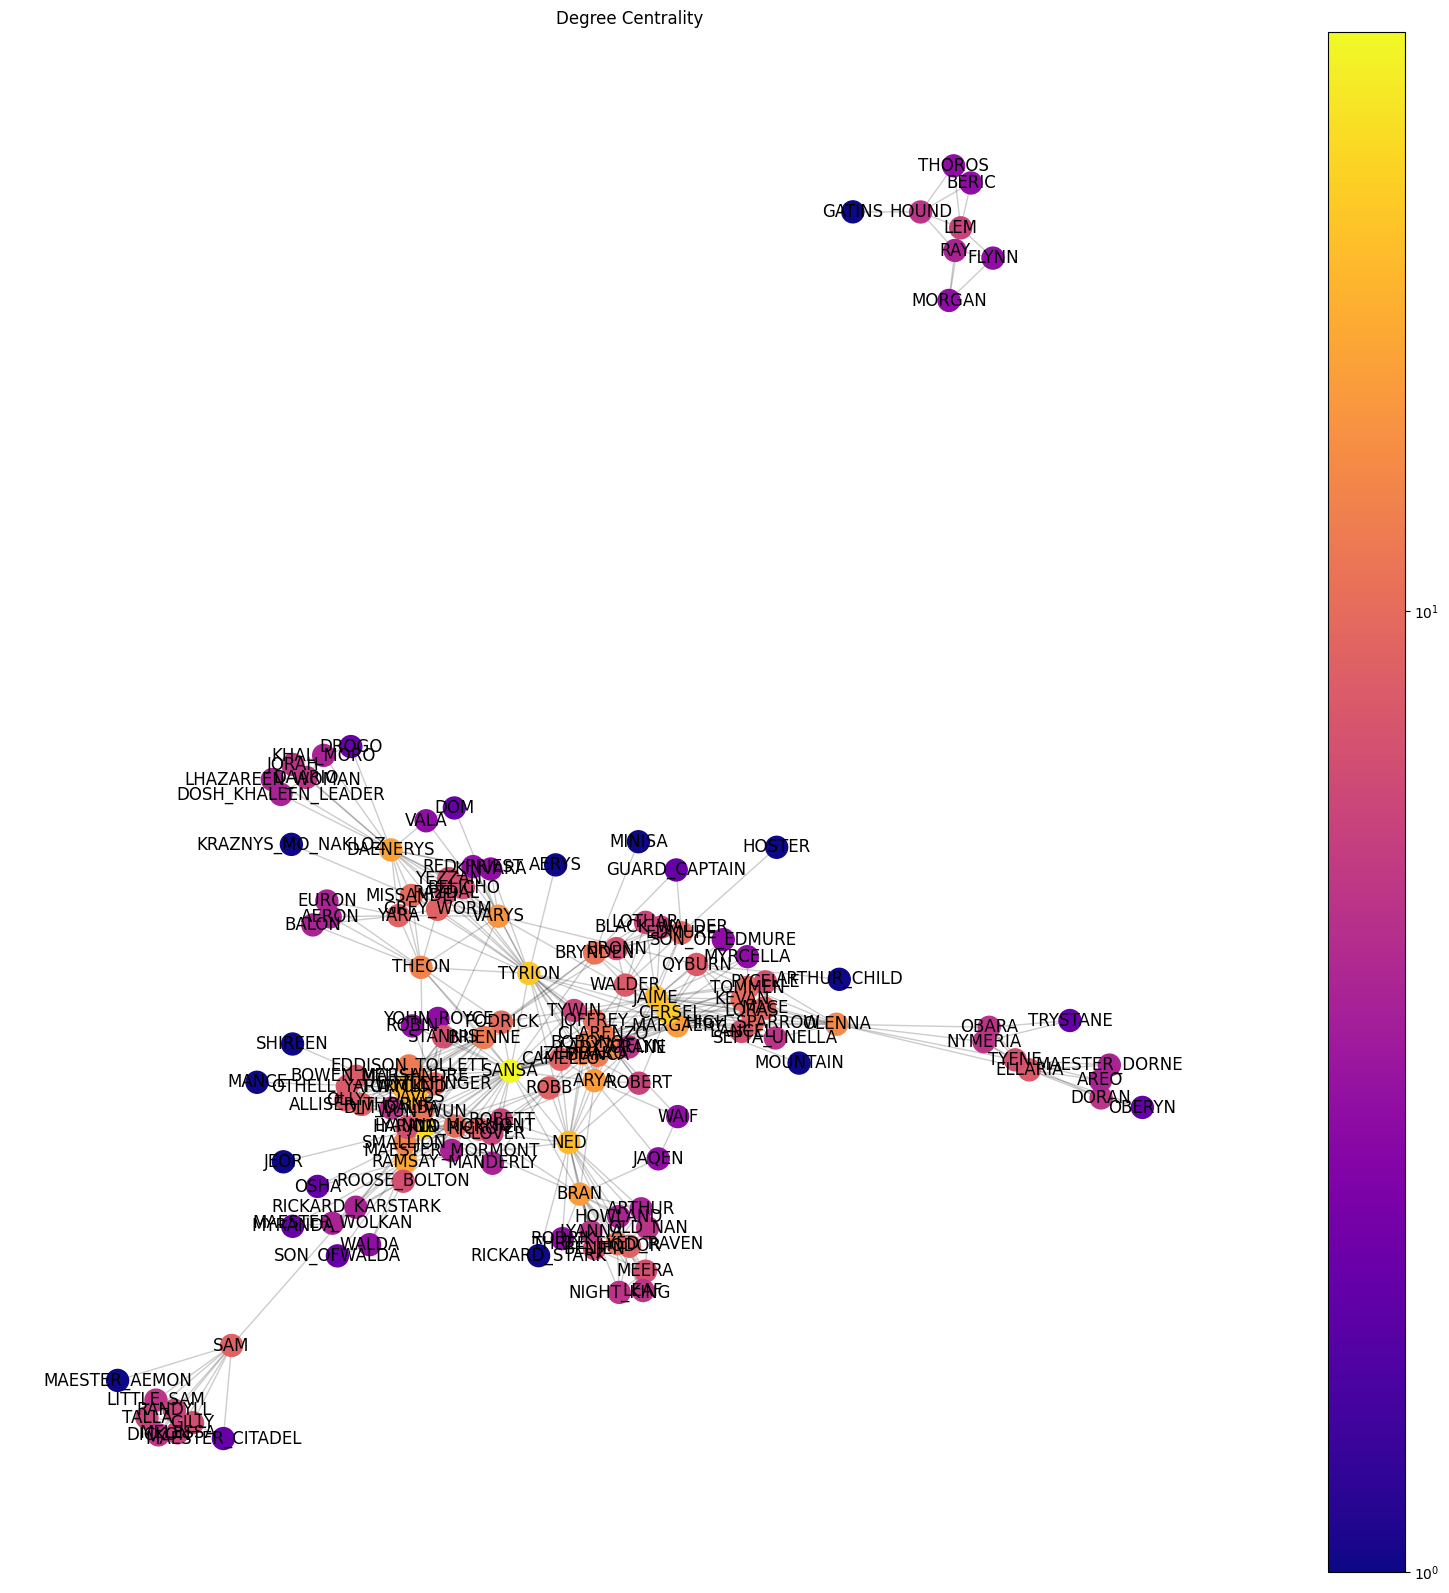

In [ ]:
draw_net(g, pos, degrees, 'Degree Centrality') # Өмнө тодорхойлсон функцээ ашиглан графаа зурж үзнэ.

### Closeness Centrality
Энэ нь сүлжээний бусад бүх зангилаа руу хэр хурдан хүрч болохыг хэмждэг. Ойролцоох Closeness Centrality бүхий зангилаа нь сайн холбогдсон бөгөөд бусад зангилаа руу хүрэх зам нь богино байдаг тул мэдээллийг үр дүнтэй түгээх боломжтой.

**Farness:** average of length of shortest paths to all other nodes

**Closeness:** inverse of the Farness (normalized by number of nodes)

In [ ]:
closeness = nx.closeness_centrality(g) # Бүх зангилааны closeness centrality-г тооцоолно

Ойролцоох centrality-р нь эрэмбэлэн эхний тавыг нь хэвлэж харна

In [ ]:
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 0.48437799501629286),
 ('TYRION', 0.4296366462644516),
 ('JON', 0.4238307456392563),
 ('CERSEI', 0.4181796690307329),
 ('JAIME', 0.4140392762680523)]

Closeness Centrality утгаар нь өнгийг нь ялгаж графикаа зурж үзэж байна.

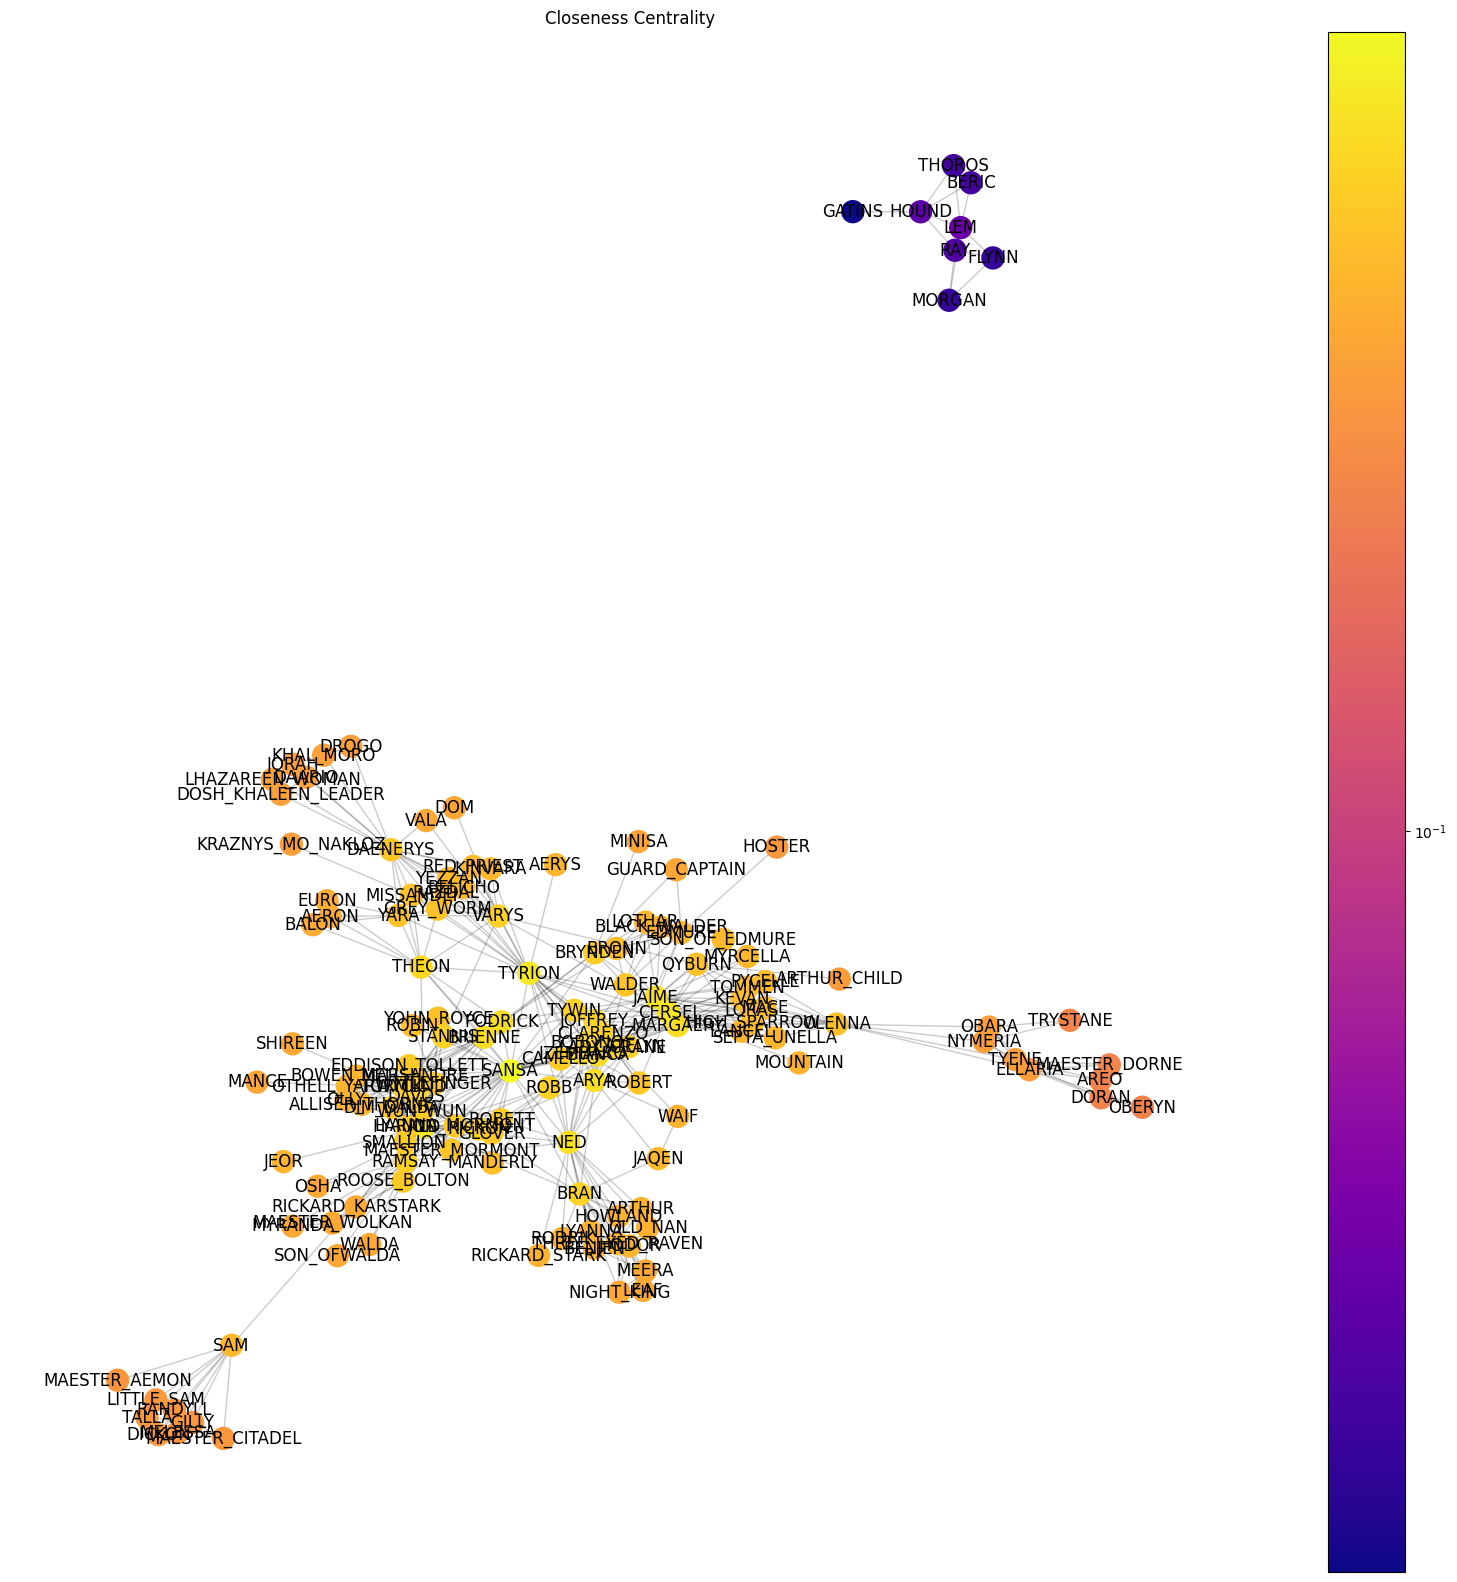

In [ ]:
draw_net(g, pos, closeness, 'Closeness Centrality')

### Betweenness Centrality

Туханй зангилаагаар дайран өнгөрөх хамгийн богино замуудаар тооцсон centrality юм.

**Assumption:** important vertices are bridges over which information flows

**Practically:** if information spreads via shortest paths, important nodes are found on many shortest paths

In [ ]:
betweenness = nx.betweenness_centrality(g) # Зангилаа бүрийн betweenness centraliry-г тооцох

Дундын centrality-р нь эрэмбэлэн эхний тавыг нь хэвлэж харна

In [ ]:
ranks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 0.2626236959730493),
 ('JON', 0.19134542283724257),
 ('TYRION', 0.14853156113828941),
 ('JAIME', 0.13044955131298),
 ('CERSEI', 0.11721858119776944)]

Betweenness Centrality утгаар нь өнгийг нь ялгаж графикаа зурж үзэж байна.

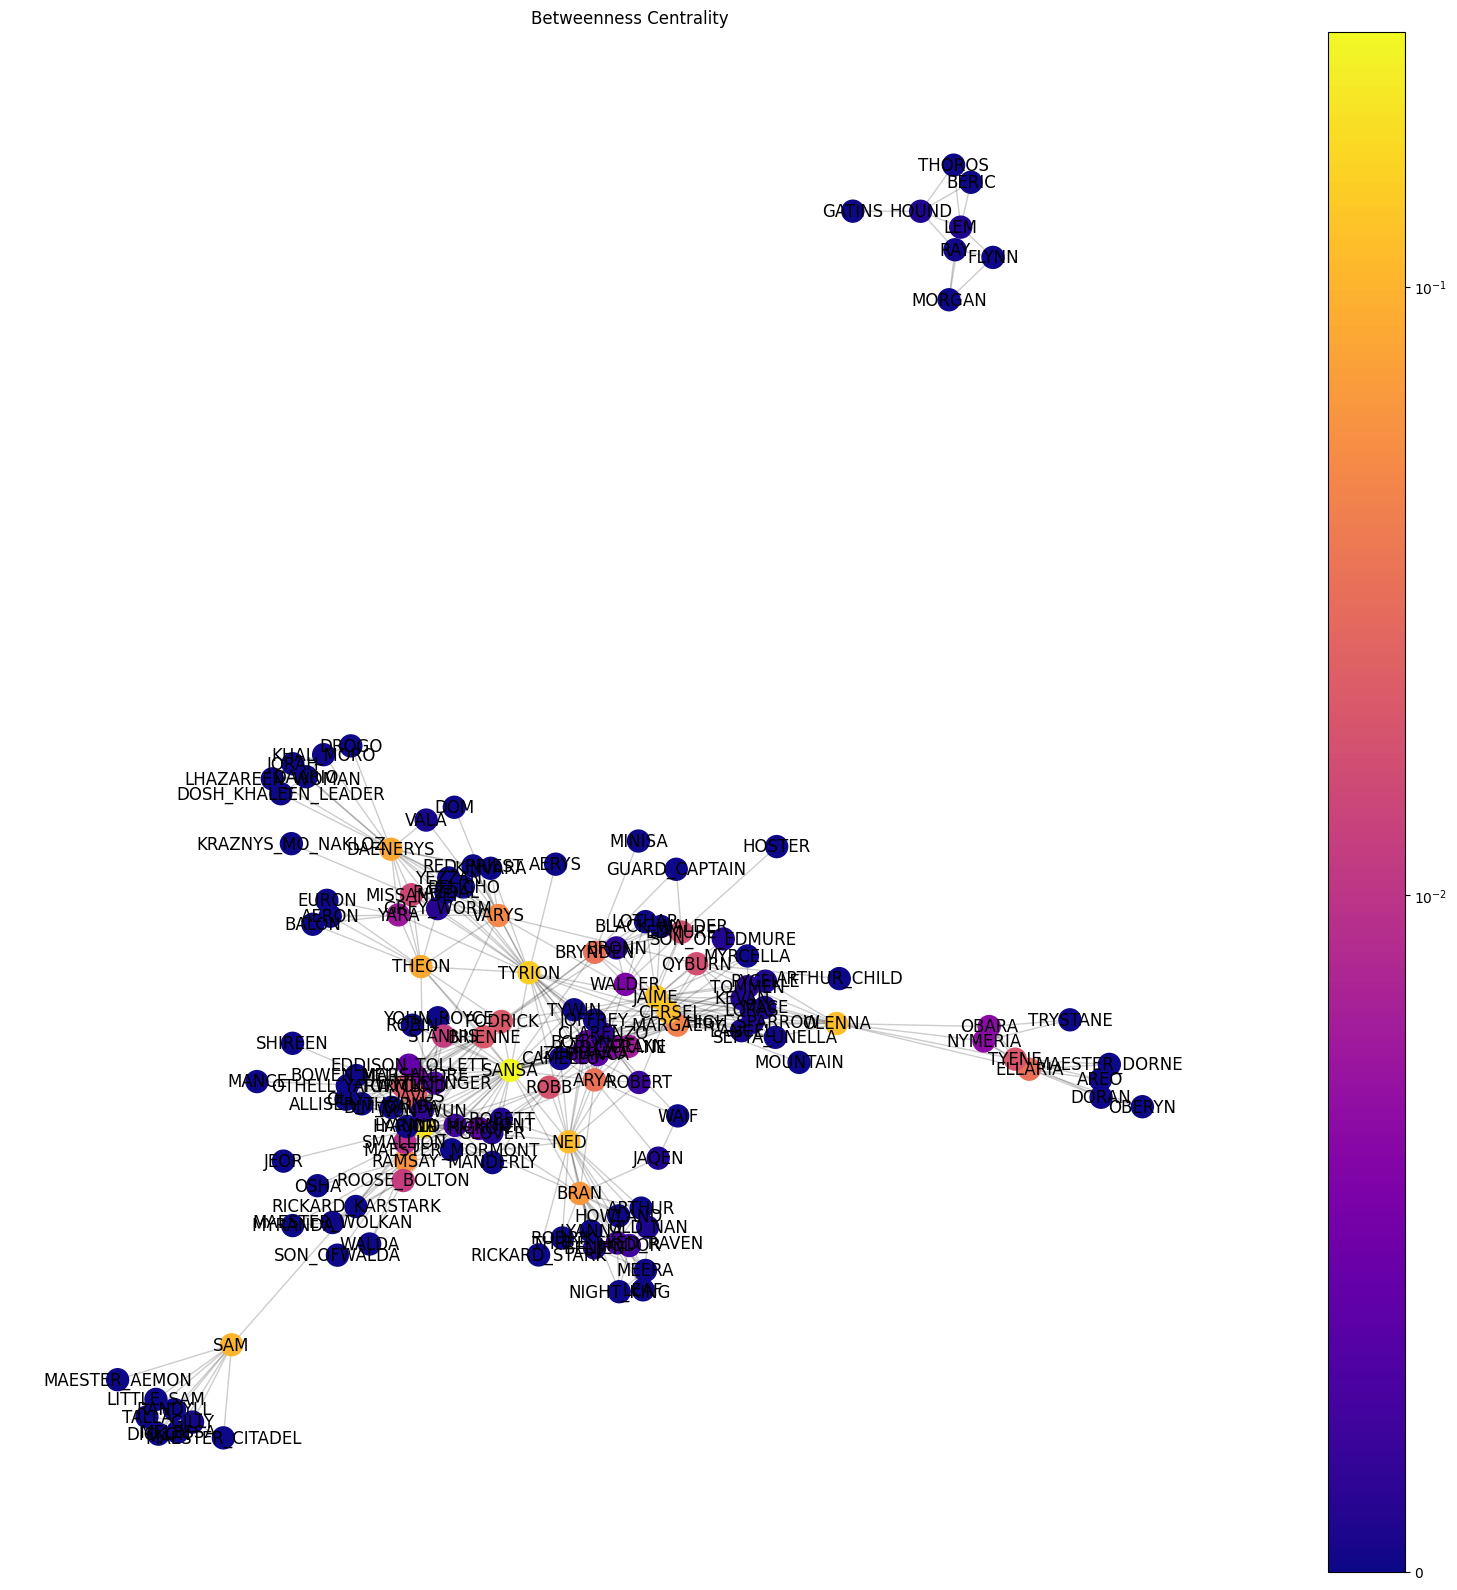

In [ ]:
draw_net(g, pos, betweenness, 'Betweenness Centrality')

### Harmonic Centrality

Harmonic mean of the geodesic (shorted paths) distances from a given node to all others. Энэ нь зангилааны нөлөөг бусад бүх зангилаа хүртэлх хамгийн богино замын урвуугийн нийлбэр дээр үндэслэн хэмждэг. Энэ нь сүлжээний салангид хэсгүүдэд байсан ч бусад олон цэгүүдтэй илүү ойр байдаг зангилаанд илүү их ач холбогдол өгдөг.

Дараах хэсэгт зангилаа бүрийн harmonic centrality-г тооцоолж, тухайн утгаар нь эрэмбэлэн эхний 5 зангилааг хэвлэж харах бөгөөд draw_net функцээ ашиглан harmonic centrality утгаар нь өнгө ялган графаа зурна.

In [ ]:
harmonic = nx.harmonic_centrality(g)

In [ ]:
ranks = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 81.41666666666666),
 ('JON', 73.33333333333336),
 ('TYRION', 71.91666666666666),
 ('CERSEI', 70.50000000000001),
 ('JAIME', 69.00000000000003)]

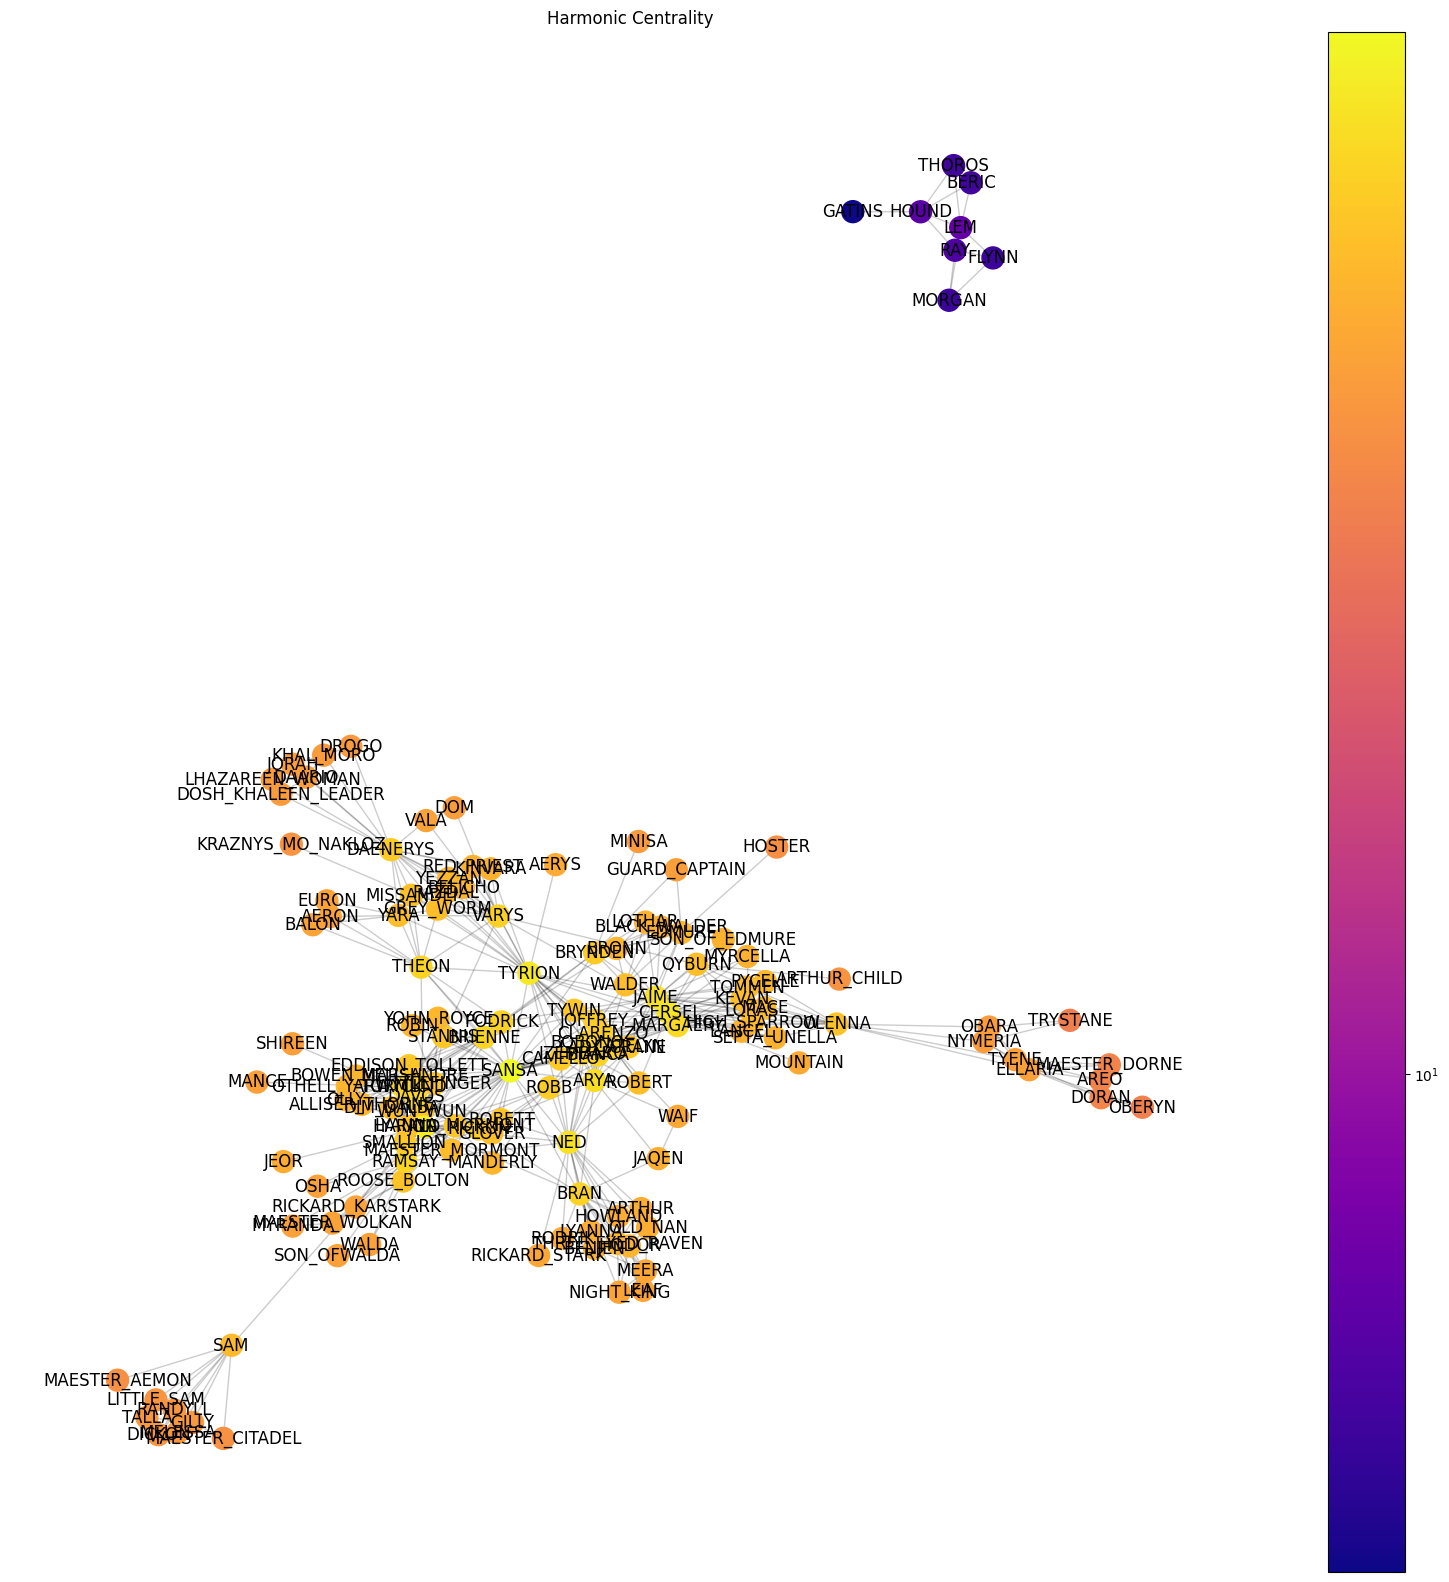

In [ ]:
draw_net(g, pos, harmonic, 'Harmonic Centrality')

### PageRank

**Main idea:** The PageRank computation can be interpreted as a Random Walk process with restart

Probability that the RW will be in node i next step depends only on the current node j and the transition probability j ➝ i determined by the stochastic matrix. Consequently this is a first-order Markov process

Тиймээс энэ бол Марковын нэгдүгээр зэрэглэлийн процесс юм
RW-ийн i зангилаанд байх хөдөлгөөнгүй магадлал (жишээ нь алхалтын урт ∞ руу чиглэх үед) зангилааны PageRank-ийг өгдөг. Өөрөөр хэлбэл, PageRank нь зангилааны ач холбогдлыг сүлжээний бусад чухал цэгүүдтэй холбох (ирмэг)-ийн тоо, чанарт үндэслэн хэмждэг. Энэ нь Google вэб хуудсуудыг хэрхэн эрэмбэлдэгтэй адил ажилладаг: зангилаа нь бусад өндөр зэрэглэлийн зангилаатай холбогдсон бол илүү чухал гэж үздэг.

Дараах хэсэгт зангилаа бүрийн PageRank-г тооцоолж, тухайн утгаар нь эрэмбэлэн эхний 5 зангилааг хэвлэж харах бөгөөд draw_net функцээ ашиглан harmonic centrality утгаар нь өнгө ялган графаа зурна.


In [ ]:
pagerank = nx.pagerank(g)

In [ ]:
ranks = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 0.028391061534083675),
 ('JON', 0.023390907243602793),
 ('CERSEI', 0.020278587723368137),
 ('TYRION', 0.02018889875063729),
 ('JAIME', 0.018551927013827622)]

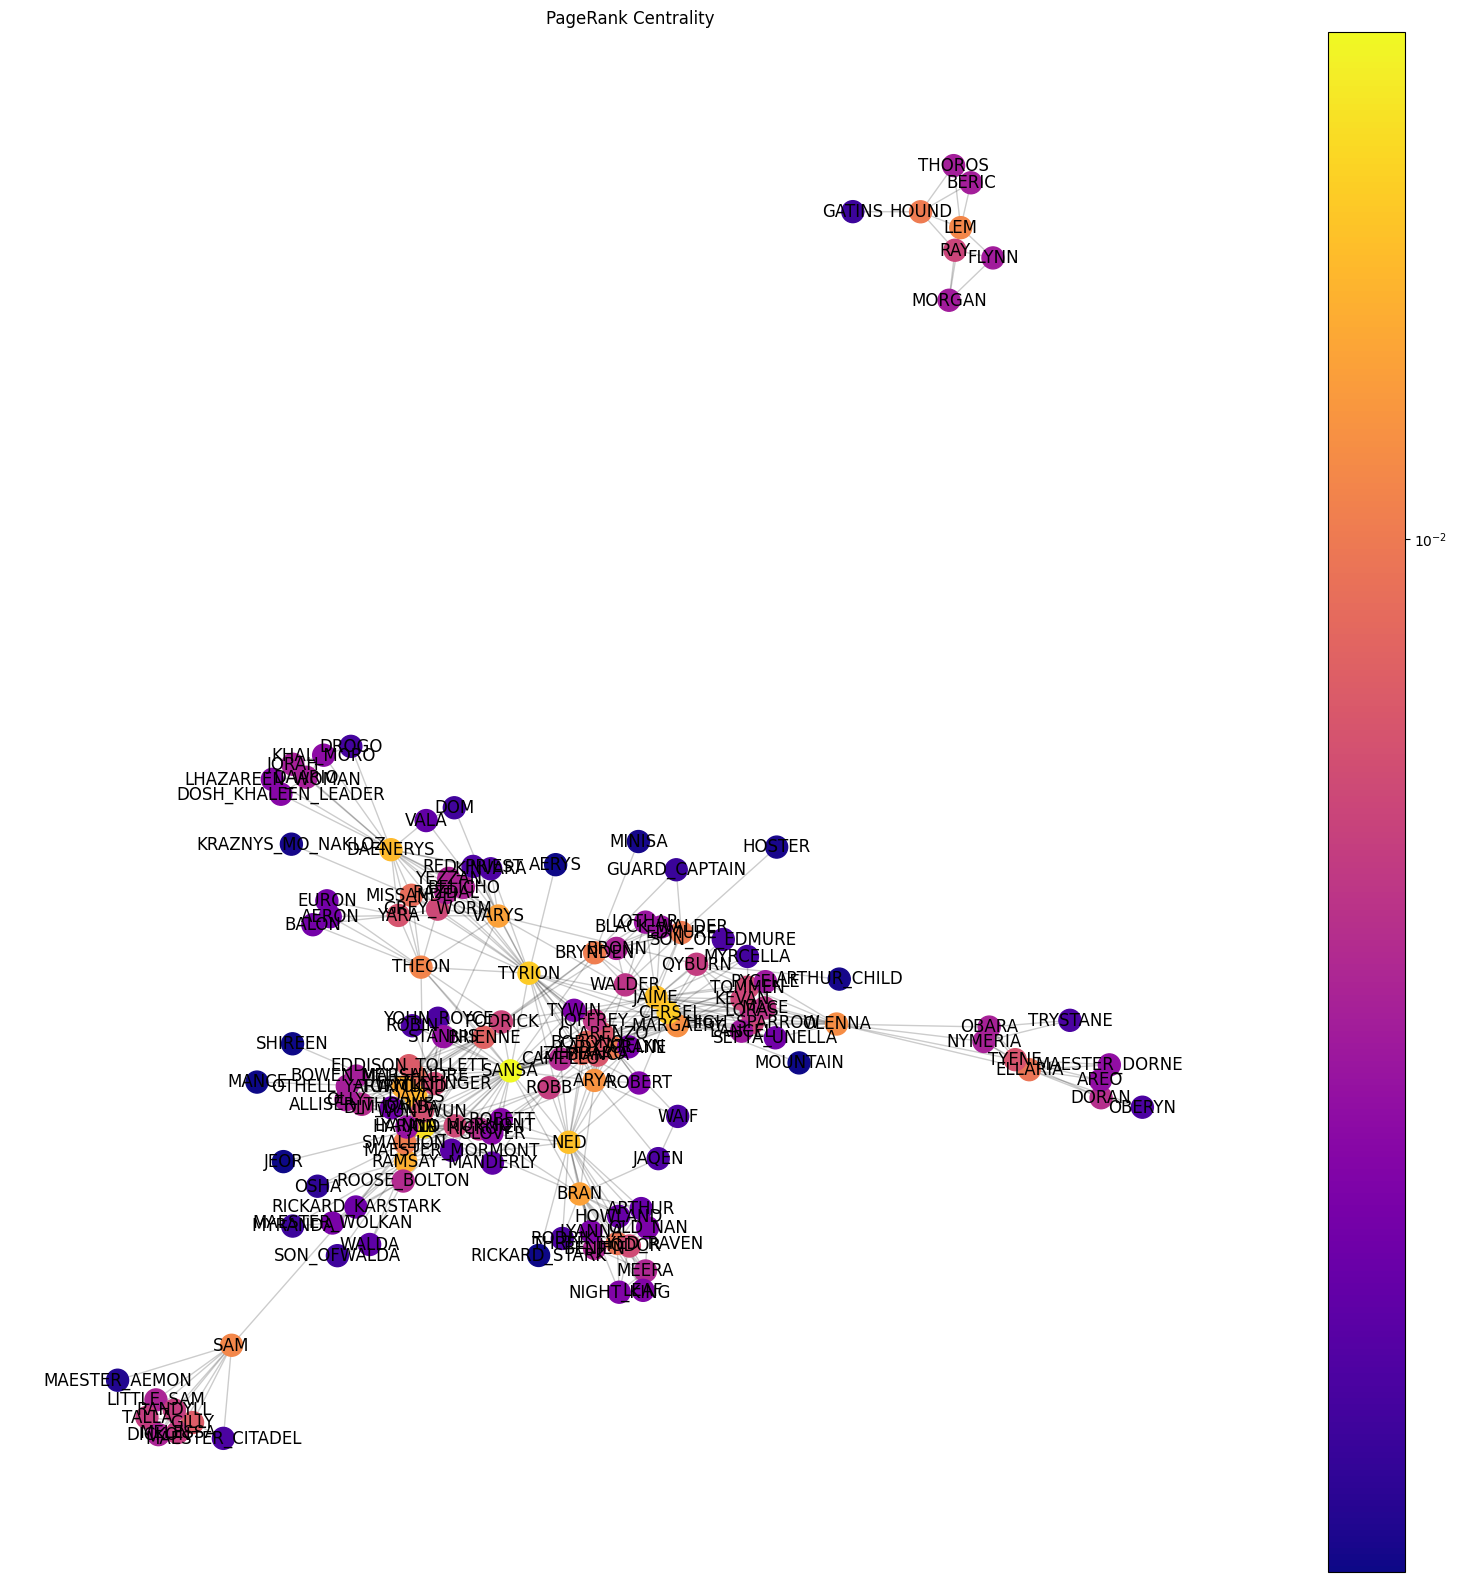

In [ ]:
draw_net(g, pos, pagerank, 'PageRank Centrality')

## Eigenvector Centrality
Eigenvector centrality нь зангилааны нөлөөллийг зөвхөн түүний холболтоос гадна түүний холбогдсон зангилааны ач холбогдлоор хэмждэг. Eigenvector Centrality өндөртэй зангилаа нь бусад өндөр нөлөө бүхий зангилаатай сайн холбогдсон байх бөгөөд энэ нь сүлжээн дэх ач холбогдлыг илүү нэмэгдүүлдэг.

Eigenvector (x) ба eigenvalue (λ) хосыг дараах хамаарлаар тодорхойлно:

Ax = λx

**x** нь N хэмжээтэй вектор бөгөөд зангилааны оноо гэж ойлгож болно

**Ax** нь хөршөөсөө хүлээн авсан онооны нийлбэртэй зангилаа тус бүрд тохирох ижил хэмжээтэй шинэ векторыг гаргана.
тэгш байдал нь шинэ оноо өмнөх оноотой пропорциональ байна гэсэн үг

Дараах хэсэгт зангилаа бүрийн Eigenvector Centrality-г тооцоолж, тухайн утгаар нь эрэмбэлэн эхний 5 зангилааг хэвлэж харах бөгөөд draw_net функцээ ашиглан harmonic centrality утгаар нь өнгө ялган графаа зурна.


In [ ]:
eigen = nx.eigenvector_centrality(g)

In [ ]:
ranks = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 0.3681703250620049),
 ('JON', 0.25752583885620856),
 ('DAVOS', 0.2120919196122236),
 ('TORMUND', 0.20473555675107596),
 ('TYRION', 0.200968439452155)]

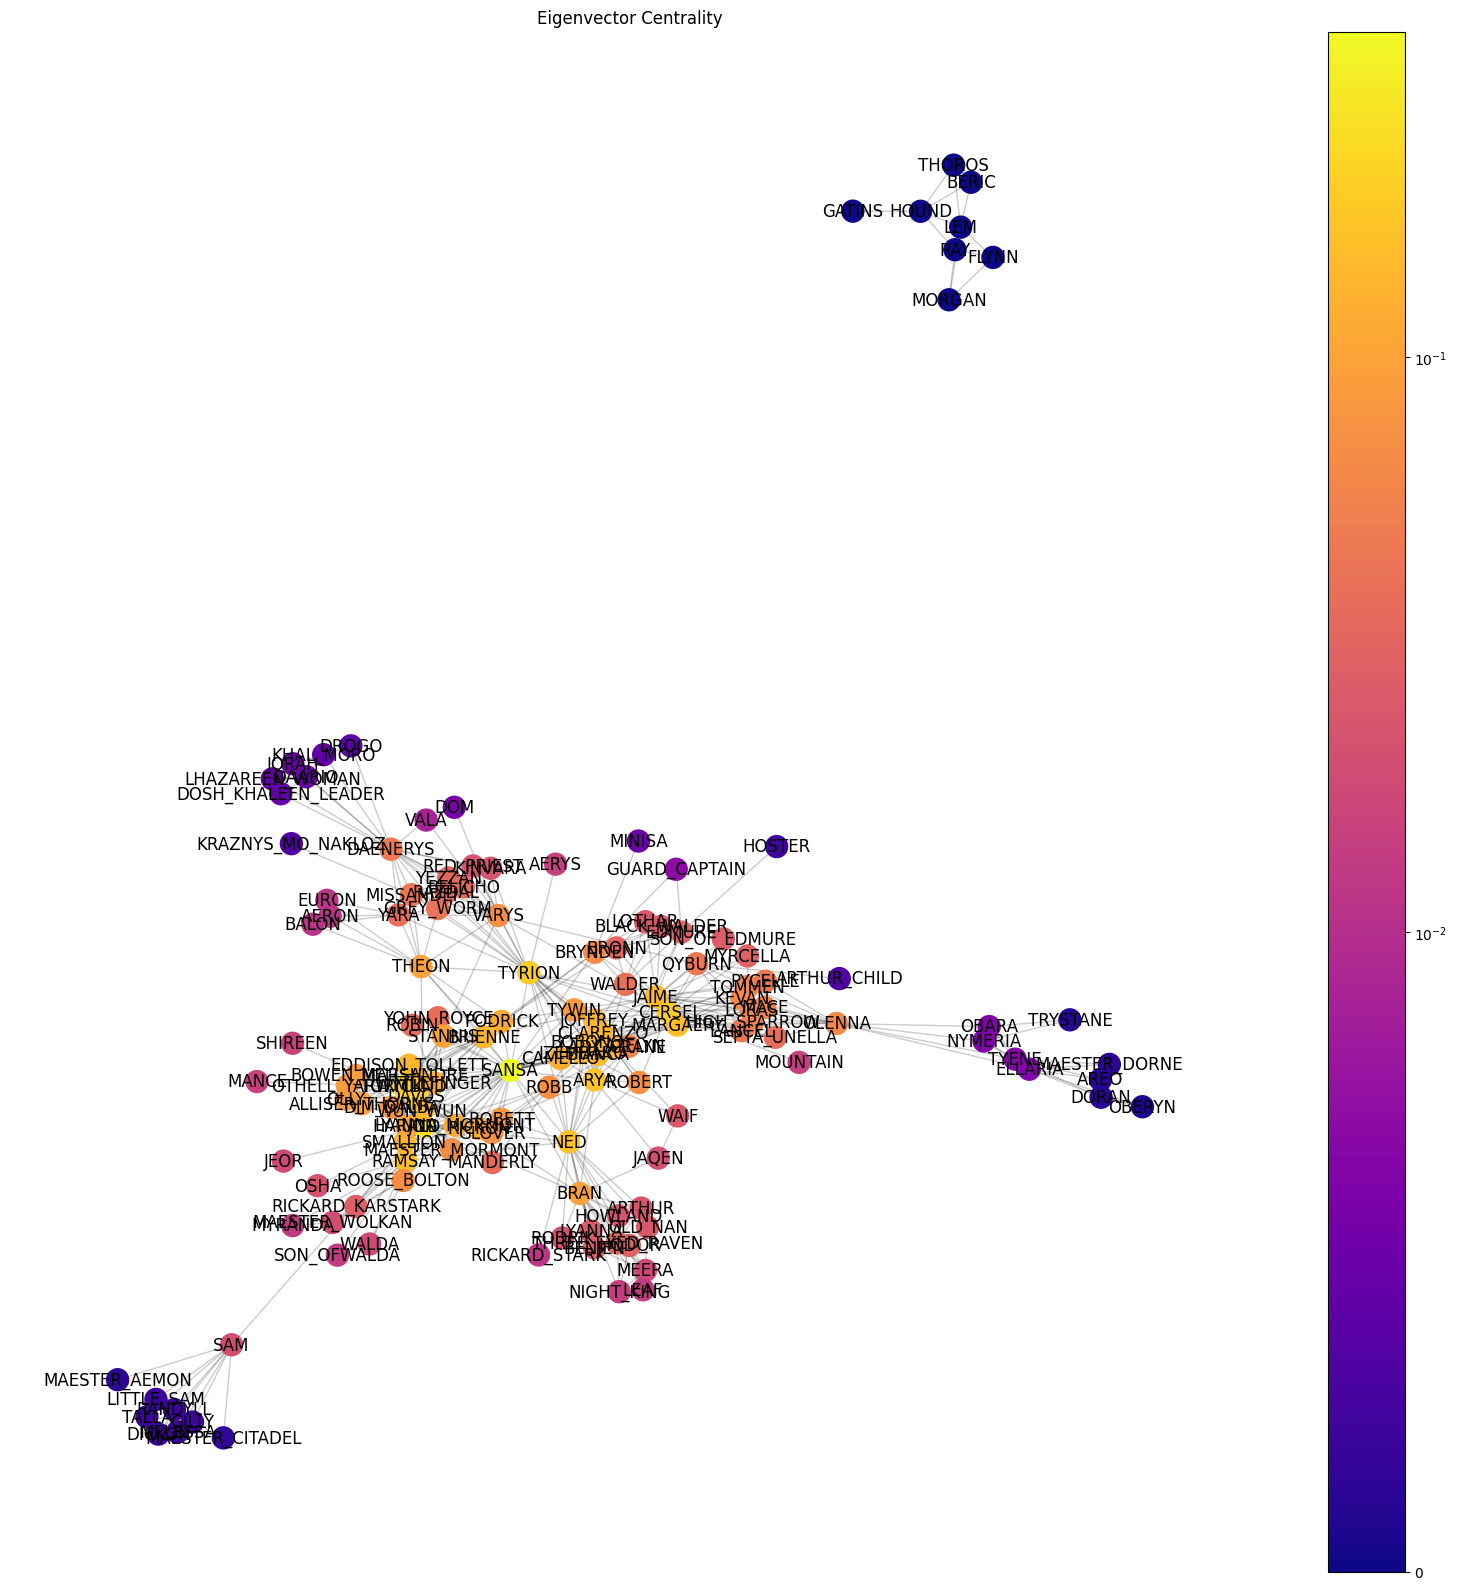

In [ ]:
draw_net(g, pos, eigen, 'Eigenvector Centrality')

### Assortative Mixing

Homophily Property зангилаа нь хүлээгдэж байснаас өндөр магадлалтай холбоотой байх хандлагатай (нийгмийн) сүлжээний ижил төстэй шинж чанар

Энэ нь (i,j) ∈ E бол x(i) ба x(j)-ийн оройн шинж чанаруудын хоорондын хамаарал болж харагдана.

**Дисссортатив холилдох:** Гомофилийн эсрэг: ижил төстэй зангилаанууд хоорондоо холбогддог (жишээ нь, бэлгийн сүлжээ, махчин-олз)

Сүлжээний өргөн (дэлхийн) хэрэглэгддэг Assortativity measures:

Newman's Assortativity

Скаляр зангилааны шинж чанарууд (жишээ нь, зэрэг) оролцож байх үед гомофилийн хэмжээг тодорхойлох

Эрдмийн зэрэг
*   Зангилаанууд нь нэгэн төрлийн w.r.t. холбох хандлагатай байдаг. тэдгээрийн зэрэг (жишээ нь, зангилаатай зангилаа)

Диассоратив зэрэг
*   Зангилаанууд нь одтой төстэй топологид холбогдох хандлагатай байдаг

Энгийнээр тайлбарлавал, Assortative Mixing нь сүлжээний зангилаанууд зэрэг (холболтын тоо) гэх мэт ижил төстэй шинж чанартай бусад зангилаатай холбогдох хандлагыг тодорхойлдог. Хэрэв өндөр зэрэгтэй зангилаа нь бусад өндөр зэргийн зангилаатай холбохыг илүүд үздэг бол сүлжээ нь төрөлжсөн; хэрэв тэдгээр нь бага зэргийн зангилаанууд руу илүү холбодог бол энэ нь эвдрэл юм.

Дараах функцээр энэхүү assortative coefficient-г тооцоолон олж байна.

In [ ]:
nx.degree_assortativity_coefficient(g)

-0.006283179316286868

### KNNK

What's the expected neighbors' degree of a node given its degree?

KNNK (k-Хамгийн ойрын хөршүүдийн k, ихэвчлэн \( k_{nn}(k) \) гэж бичдэг) сүлжээн дэх \( k \) зэрэгтэй зангилааны хөршүүдийн дундаж зэргийг хэмждэг. Энэ нь өндөр зэрэглэлийн зангилаа нь бусад өндөр зэрэглэлийн зангилаа (төрөл бүрийн холих) эсвэл бага зэрэгтэй зангилаа (диассортатив холих) -тай холбогдох хандлагатай эсэхийг ойлгоход тусалдаг.

In [ ]:
knn = nx.average_neighbor_degree(g) #к зээрэгтэй зангилаануудын дундаж хамгийн ойр хөршийн зэргийг тооцно.
knn = dict(sorted(knn.items())) #тооцоолсон knn эрэмбэлэнэ

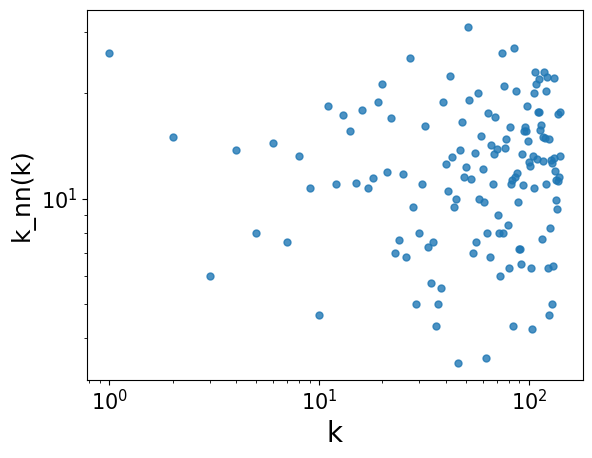

In [ ]:
# Зангилааны 'k' зэрэг ба хамгийн ойрын хөршийн дундаж зэрэг 'k_nn(k)' хоорондын хамаарлыг зурна.
plt.plot(list(knn.keys()), list(knn.values()), '.', ms=10, alpha=0.8)

plt.loglog() # Хоёр тэнхлэгт логарифм хэмжээсийг хэрэглэнэ
plt.xlabel("k", fontsize=20) # Х тэнхлэгийн нэрийг өгөх
plt.ylabel("k_nn(k)", fontsize=18) # y-тэнхлэгийн утгыг өгөх
# Тэнхлэгүүдийн фонтын хэмжээг зааж өгөх
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show() # Үүсгэсэн графыг зурах

### Newman Assortativity on node properties

Same as the standard Newman's assortativity but computed on semantic information attached to nodes (e.g., labels)

Өөрөөр ижил төстэй шинж чанартай (нас, эд баялаг, төрөл гэх мэт) зангилаанууд сүлжээнд хэр хүчтэй холбогддог болохыг харуулдаг. Энэ нь зөвхөн холболтын хэв маягаас илүүтэй ангилсан эсвэл тоон зангилааны шинж чанаруудыг харгалзан үзээд зэрэглэлийн шинж чанарыг нэмэгдүүлдэг.


In [ ]:
nx.attribute_assortativity_coefficient(g, 'house')

0.2074748054739663

node_conformity санд тохиромжтой хувилбар нь 23.1 тул pip-н 23.1 дэх хувилбарыг татаж авч байна.

In [ ]:
!pip install pip==23.1

Node conformity гэх энэхүү санг сүлжээн дэх assortative mixing-д дүн шинжилгээ хийхэд ашигладаг, ялангуяа зангилааны шинж чанарууд нь холболтын загварт хэрхэн нөлөөлж байгаад илүү төвлөрдөг. Энэ нь сүлжээн дэх нийгмийн болон бүтцийн гажуудлыг ойлгоход тусалдаг зэрэглэл эсвэл ангиллын шинж чанар гэх мэт шинж чанарууд дээр үндэслэн хөршүүдтэйгээ хэр төстэй зангилаа болохыг хэмжих хэрэгслүүдээр хангадаг.

In [ ]:
!pip install node_conformity

**Node conformity** нь зангилааны шинж чанар (зэрэг, шинж чанар гэх мэт) нь хөршүүдийн дундаж шинж чанартай хэр төстэй болохыг хэмждэг. Энэ нь зангилаанууд нь хүрээлэн буй сүлжээний бүтцэд хэр нийцэж байгааг шинжлэхэд тусалдаг бөгөөд энэ нь нийгмийн нөлөөлөл, ижил төстэй байдал, сүлжээний динамикийг ойлгоход тустай.

Дараах код нь сүлжээн дэх атрибутын conformity-г, ялангуяа байшингийн шинж чанарт үндэслэн хөршүүдтэйгээ хэр зэрэг нийцэж байгааг тооцоолдог. Энэ нь эхлээд сүлжээнээс хамгийн том холбогдсон бүрэлдэхүүн хэсгийг гаргаж аваад дараа нь өөр өөр задралын хүчин зүйлсийг ашиглан шинж чанарын нийцлийн функцийг ашиглана.

In [ ]:
h = g.copy()

In [ ]:
from conformity import attribute_conformity  # Хэрэглэх санг татаж авч ирнэ
import pandas as pd  # Боломжит өгөгдөл боловсруулахад зориулж pandas санг импортлох

#'h' графикаас бүх холбогдсон бүрэлдэхүүн хэсгүүдийг олон буурахаар эрэмбэлнэ.
gcc = sorted(nx.connected_components(h), key=len, reverse=True)

# Хамгийн том бүрэлдэхүүн бүхий дэд графыг ялгаж авна.
h0 = h.subgraph(gcc[0])

# Тооцооллын decay factors-г тодорхойлно
alphas = [1.0, 2.0, 3.0, 4.0, 5.0]  # Өндөр байх тусам хөршүүдэд өгөх ачаалал их байна

# Хамгийн том бүрэлдэхүүн хэсэг дэх 'house' шинж чанарын тохирлыг тооцоолох
res = attribute_conformity(h0, alphas, ['house'], profile_size=1)


100%|██████████| 134/134 [00:01<00:00, 86.16it/s]


Энэ код нь decay factor (альфа) бүрийн kernel density estimation (KDE) ашиглан attribute conformity өгөгдлийн тархалтыг дүрслэн харуулдаг. Энэ нь янз бүрийн задралын хүчин зүйлсийн дагуу профайл бүрийн KDE муруйг зурж, графикийн харагдах байдлыг өөрчилдөг.

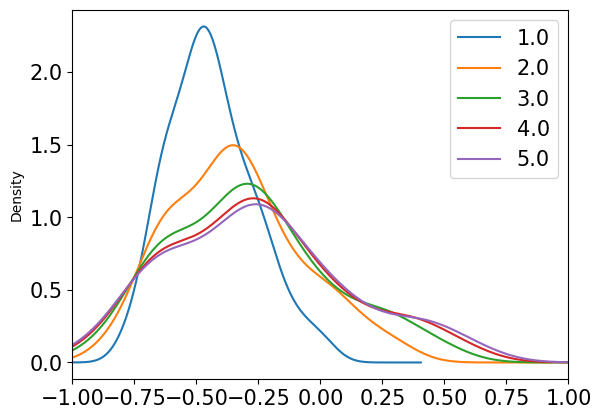

In [ ]:
_, ax = plt.subplots()  # Шинэ график болон түүний тагийг үүсгэх

# Decay factors ('alpha') болон тэдгээрийн холбогдсон профайл болон өгөгдлүүдийн хувьд давталт хийнэ
for alpha, profiles in res.items():
    for profile, data in profiles.items():
        # Conformity өгөгдлийг DataFrame болгож хувиргах нь график дээр амархан зурж болох
        df = pd.DataFrame(list(data.values()), columns=[alpha])

        # Одоогийн профайлд зориулсан KDE (Kernel Density Estimate) хазайлт зурах
        df.plot.kde(ax=ax)

plt.xticks(fontsize=15)  # X тагийн үсгийн хэмжээ тохируулах
plt.yticks(fontsize=15)  # Y тагийн үсгийн хэмжээ тохируулах
plt.xlim((-1, 1))  # X тагийн хязгаарыг -1 ба 1 хооронд тохируулах
plt.legend(fontsize=15)  # Legend-ийн үсгийн хэмжээг тохируулах
plt.show()  # Графикийг үзүүлэх


res өгөгдлийн сангаас 3.0 буурах хүчин зүйлтэй (alpha=3.0) "house" атрибутын нийцлийн профайлыг авч, conf_a3 гэсэн хувьсагчид хадгалж байна. Ингэснээр 3.0 гэсэн буурах хүчин зүйлтэй нийцлийн өгөгдлийг цаашид ашиглах боломжтой.

In [ ]:
conf_a3 = res['3.0']['house']

Дараах код нь conf_a3 доторх бүх элементийг үнэлгээ (v) -ийн дагуу эрэмбэлж, k (key) болон v (value) хоёрыг node_assortativity гэсэн жагсаалтад хадгална.

In [ ]:
node_assortativity = [(k, v) for k, v in sorted(conf_a3.items(), key=lambda item: item[1])]

Мөн энэ хэсэгт node_assortativity жагсаалтын эхний 5 элементийг дамжуулан, тухайн элементүүдийн node (түлхүүр), value (үнэлгээ) болон тухайн node-ийн "house" аттрибутыг хэвлэнэ.

In [ ]:
for nd in node_assortativity[0:5]:
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{h.nodes[nd[0]]['house']: >20}")

                JEOR	-0.931038573874242	       Night's Watch
             SHIREEN	-0.9287300518300002	           Baratheon
               GILLY	-0.816164752888596	           Wildlings
        ARTHUR_CHILD	-0.8074085546571529	            Commoner
     MAESTER_CITADEL	-0.778874474317457	             Citadel


Энэ код нь node_assortativity жагсаалтын сүүлийн 5 элементийг (эхний 6-8 элементийг хасаж) эргүүлж, тухайн node-ийн нэр, утга болон "house" аттрибутын утгыг хэвлэнэ.

In [ ]:
for nd in list(reversed(node_assortativity[-6:-1])):
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{h.nodes[nd[0]]['house']: >20}")

              LYANNA	0.48983121524161594	               Stark
       RICKARD_STARK	0.44896734570683966	               Stark
         SON_OFWALDA	0.4376999846379132	              Bolton
              BENJEN	0.3502922883738541	               Stark
               WALDA	0.33535527594258246	              Bolton


node_assortativity жагсаалтаас key-value хосуудыг авч na гэсэн dictionary үүсгэнэ. Энд key нь node нэр болон value нь assortativity (хамтралын) утга болно. Үүнийхээ дараа na утгаа ашиглан зангилаануудыг өнгөөр ялган графаа зурж байна.

In [ ]:
na = {c[0]: c[1] for c in node_assortativity}

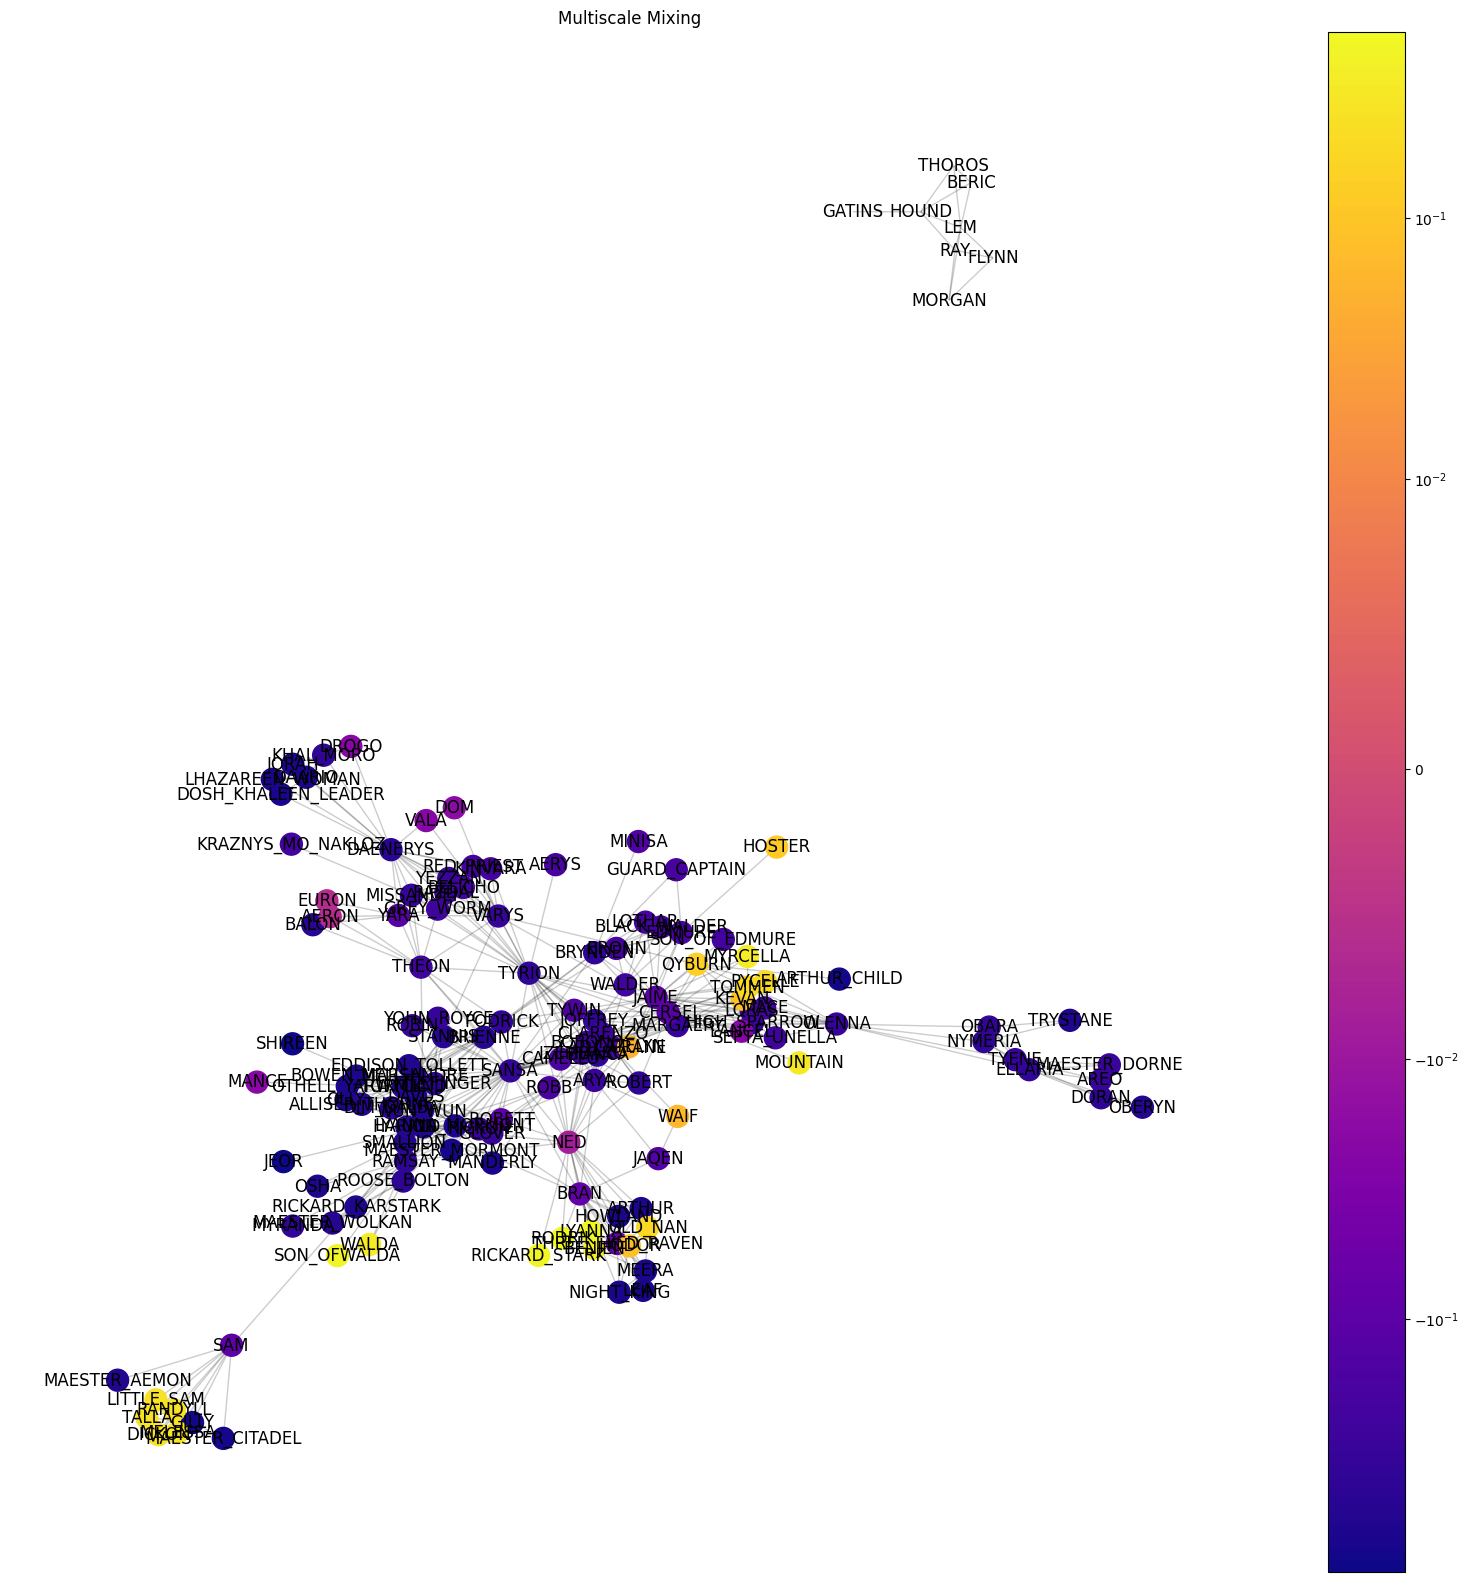

In [ ]:
draw_net(h, pos, na, "Multiscale Mixing")

## **2-р хэсэг**
Энэ код нь чиглэлгүй болон чиглэлтэй граф үүсгэж, тэдгээрийн degree centrality-г тооцож, дараа нь centrality оноон дээр үндэслэн шилдэг нөлөөлөгчдийг тодорхойлж хэвлэж байна.

In [ ]:
import networkx as nx

# Чиглэлгүй граф үүсгэх нь
G = nx.Graph()  # Графаа зарлана
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)]  # Оройн ирмэгүүдийг листээр илэрхийлнэ
G.add_edges_from(edges)  # Ирмэгүүдээ графдаа нэмж өгнө

# degree centrality тооцно
degree_centrality = nx.degree_centrality(G)

# Үр дүнгээ хэвлэнэ
print("Degree Centrality for Undirected Graph:")
# Орой бүрийн хувьд тэдгээрийн centrality score-г хэвлэнэ
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")


# Чиглэлтэй граф үүсгэнэ
DG = nx.DiGraph()  # Графаа зарлана
edges = [(1, 2), (2, 3), (3, 1), (3, 4), (4, 5)]  # Оройн ирмэгүүдийг листээр илэрхийлнэ
DG.add_edges_from(edges)  # Ирмэгүүдээ графдаа нэмж өгнө

# Орох зэрэг болон гарах зэргийн centrality-г тооцно
in_degree_centrality = nx.in_degree_centrality(DG)
out_degree_centrality = nx.out_degree_centrality(DG)

# Үр дүнгээ хэвлэнэ
# Орой бүрийн хувьд тэдгээрийн орох зэргийн centrality-г хэвлэнэ
print("\nIn-Degree Centrality for Directed Graph:")
for node, centrality in in_degree_centrality.items():
    print(f"Node {node}: {centrality}")

# Орой бүрийн хувьд тэдгээрийн орох зэргийн centrality-г хэвлэнэ
print("\nOut-Degree Centrality for Directed Graph:")
for node, centrality in out_degree_centrality.items():
    print(f"Node {node}: {centrality}")


# Өгөгдлийн сангаа уншиж df-д хадгална
df = pd.read_csv("/content/drive/My Drive/asioaf/higgs-retweet_network.csv")

# Чиглэлтэй граф үүсгэнэ
G = nx.from_pandas_edgelist(df, source="source", target="target", create_using=nx.DiGraph())  # Create a directed graph from the CSV data

# degree centrality тооцно
degree_centrality = nx.degree_centrality(G)

# Degree centrality-аа буурахаар эрэмбэлэн хамгийн нөлөө бүхий 10 хүнийг top_influencers-т хадгална
top_influencers = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# top_influencers доторх 10 нөлөөлөгчдийн нэр болон degree centrality-г нь хэвлэж харна
print("\nTop 10 Influencers based on Degree Centrality:")
for node, centrality in top_influencers:
    print(f"User {node}: {centrality}")


Degree Centrality for Undirected Graph:
Node 1: 0.5
Node 2: 0.75
Node 3: 0.75
Node 4: 0.75
Node 5: 0.25

In-Degree Centrality for Directed Graph:
Node 1: 0.25
Node 2: 0.25
Node 3: 0.25
Node 4: 0.25
Node 5: 0.25

Out-Degree Centrality for Directed Graph:
Node 1: 0.25
Node 2: 0.25
Node 3: 0.5
Node 4: 0.25
Node 5: 0.0

Top 10 Influencers based on Degree Centrality:
User 88: 0.054820850715427506
User 14454: 0.024133494483215723
User 677: 0.02191508440874888
User 1988: 0.01690514250068229
User 349: 0.010928301298296231
User 283: 0.007949627665795938
User 3571: 0.00772349799212445
User 6948: 0.007637724667628368
User 14572: 0.006596748411244103
User 68278: 0.006585052048812819
